## Task 1. Unemployment Rate and House Prices 

In [1]:
import pandas as pd # importing the panda library and name it as pd
import numpy as np # importing the numpy library and name it as np
import matplotlib.pyplot as plt # importing matplot library and name it as ply
%matplotlib inline 
from motionchart.motionchart import MotionChart # importing motion chart library
import datetime # importing datetime library

### Read files

In [2]:
erp_reports = pd.read_csv('ERP_by state and gender.csv') # Read ERP_reports csv file - population
house_reports = pd.read_csv('House Price Index.csv') # Read House_reports csv file - price index
sa4_reports = pd.ExcelFile('SA4 Time Series - October 2016.xls') # Read SA4_reports xls file - unemployment rate

#erp_reports
#house_reports
#sa4_reports

### Extract and Rename files

In [3]:
# Extract the columns for ERP_Reports
erp_reports = erp_reports.iloc[:,[0, 19, 20, 21, 22, 23, 24, 25, 26]]

#erp_reports

# Rename the columns for erp_reports data
erp_reports.columns = ['Date', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']

#erp_reports

In [4]:
# Rename the columns for house_reports data 
house_reports.columns = ['Date', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']

# house_reports

In [5]:
# Parse the date for the sa4_reports data
sa4_reports = sa4_reports.parse('Time Series')

# Extract the columns
sa4_reports = sa4_reports.iloc[:,[0,1,3]]

#sa4_reports

# Rename the couluns for sat_reports data
sa4_reports.columns = ['State', 'Date', 'Unemployment Rate']

#sa4_reports

### Change dataframes

In [6]:
# erp_reports - population

# save date data to date_pop
date_pop = erp_reports['Date']

#type(date_erp)

# date column for erp_reports
date = []
for i in range(len(date_pop)):
    date += [date_pop[i]] * 8
    
#date
#len(date)

# state column for erp_reports
state = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'] * len(erp_reports)
#len(state)

# population column for erp_reports
population = []
for i in range(len(erp_reports)):
    for j in range(1,len(erp_reports.iloc[1])):
        population.append(erp_reports.iloc[i][j])

#len(population)

# Create the new dataframe for erp_reports
new_erp_reports = pd.DataFrame({'Date' : date, 'State' : state, 'Population': population})

#new_erp_reports

In [7]:
# house_reports - price index

# save date data to date_price
date_price = house_reports['Date']
#len(date_price)

# date column for house_reports
date_h = []
for i in range (len(house_reports)):
    date_h += [date_price[i]] * 8

#len(date_h)

# state column for house_reports
state_h = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'] * len(house_reports)
#len(state_h)

# price column for house_reports
price = []
for i in range (len(house_reports)):
    for j in range(1, len(house_reports.iloc[i])):
        price.append(house_reports.iloc[i][j])
        
# create the new dataframe for house_reports
new_house_reports = pd.DataFrame({'Date' : date_h, 'State' : state, 'House Price' : price})

#new_house_reports

### Change time formats

In [8]:
# change time format (dd/mm/yy) for erp_reports
new_erp_reports.Date = pd.to_datetime(new_erp_reports.Date)
new_erp_reports.Date = new_erp_reports.Date.apply(lambda x: datetime.datetime.strftime(x, '%d/%m/%y'))

#new_erp_reports

# change time format (dd/mm/yy) for house_reports
new_house_reports.Date = pd.to_datetime(new_house_reports.Date)
new_house_reports.Date = new_house_reports.Date.apply(lambda x: datetime.datetime.strftime(x, '%d/%m/%y'))

#new_house_reports

# change time format (dd/mm/yy) for sa4_reports
sa4_reports.Date = pd.to_datetime(sa4_reports.Date)
sa4_reports.Date = sa4_reports.Date.apply(lambda x: datetime.datetime.strftime(x, '%d/%m/%y'))

#sa4_reports

### Merge the data

In [129]:
# merge three prepared data for motionchart 
motionchart_data = pd.merge(pd.merge(new_erp_reports, new_house_reports), sa4_reports)
motionchart_data.head()

,Date,Population,State,House Price,Unemployment Rate
0,01/12/05,6718023,NSW,81.8,5.293757
1,01/12/05,5023203,VIC,64.0,5.260037
2,01/12/05,3964175,QLD,75.0,4.863610
3,01/12/05,1544852,SA,71.6,4.868181
4,01/12/05,2029936,WA,70.0,4.326411


### Generate the motionchart

In [10]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [11]:
mChart = MotionChart(df = motionchart_data, key = 'Date', x = 'Unemployment Rate', y = 'House Price', 
                     xscale = 'linear', yscale = 'linear', size = 'Population', color = 'State', 
                     category = 'State')

mChart.to_notebook()

### Task1 questions

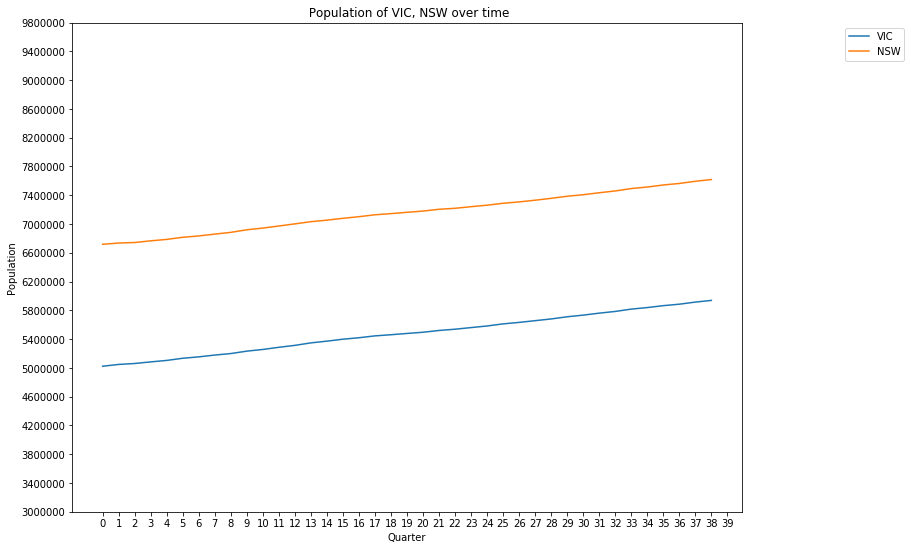

In [12]:
# q5

# Setting up
fig, q1 = plt.subplots(figsize=(12,9))

# Vic pop
vic, = q1.plot(erp_reports['VIC'], label='VIC')
# NSW pop
nsw, = q1.plot(erp_reports['NSW'], label='NSW')

# Legend setup
q1.legend(handles=[vic,nsw], loc=1, bbox_to_anchor=(1.25,1)) #bbox_to_anchor moves legends
#Title setup
plt.title(' Population of VIC, NSW over time')
# x-axis setup
x_ticks = np.arange(0, 40, 1)
q1.set_xticks(x_ticks)
plt.xlabel('Quarter')

# y-axis setup
y_ticks = np.arange(3000000, 10000000, 400000)
q1.set_yticks(y_ticks)
plt.ylabel('Population')

plt.show()


In [13]:
#q1
temp1 = motionchart_data[:8]
temp1

,Date,Population,State,House Price,Unemployment Rate
0,01/12/05,6718023,NSW,81.8,5.293757
1,01/12/05,5023203,VIC,64.0,5.260037
2,01/12/05,3964175,QLD,75.0,4.863610
3,01/12/05,1544852,SA,71.6,4.868181
4,01/12/05,2029936,WA,70.0,4.326411
5,01/12/05,488098,TAS,79.1,5.962563
6,01/12/05,207385,NT,60.2,6.004577
7,01/12/05,333505,ACT,71.7,3.422536


In [14]:
#q1
temp2 = motionchart_data[-8:]
temp2

,Date,Population,State,House Price,Unemployment Rate
304,01/06/15,7618241,NSW,149.8,5.845268
305,01/06/15,5938119,VIC,120.8,6.055538
306,01/06/15,4779400,QLD,113.7,5.994555
307,01/06/15,1698594,SA,108.5,7.906160
308,01/06/15,2591585,WA,113.4,6.003158
309,01/06/15,516630,TAS,105.7,6.432085
310,01/06/15,244602,NT,112.6,4.484751
311,01/06/15,390757,ACT,106.2,4.540913


In [128]:
#q1
mean1 = temp1.loc[:, 'House Price']
count1 = len(mean1)
sum = 0
for i in mean1:
    sum += i
avg = sum / count1
avg

71.675

In [ ]:
#q1
mean2 = temp1.loc[:, 'Unemployment Rate']
count2 = len(mean2)
sum = 0
for i in mean2:
    sum += i
avg = sum / count2
avg

In [ ]:
#q1
mean3 = temp2.loc[:, 'House Price']
count3 = len(mean3)
sum = 0
for i in mean3:
    sum += i
avg = sum / count3
avg

In [ ]:
#q1
mean4 = temp2.loc[:, 'Unemployment Rate']
count4 = len(mean4)
sum = 0
for i in mean4:
    sum += i
avg = sum / count4
avg

In [ ]:
q1
# Setting up
fig, q1_1 = plt.subplots(figsize=(12,9))

# Vic pop
vic, = q1_1.plot(house_reports['VIC'], label='VIC')
# NSW pop
nsw, = q1_1.plot(house_reports['NSW'], label='NSW')
# QLD pop
qld, = q1_1.plot(house_reports['QLD'], label='QLD')
# SA
sa, = q1_1.plot(house_reports['SA'], label='SA')
# WA
wa, = q1_1.plot(house_reports['WA'], label='WA')
# NT
nt, = q1_1.plot(house_reports['NT'], label='NT')
#ACT
act, = q1_1.plot(house_reports['ACT'], label='ACT')
#TAS
tas, = q1_1.plot(house_reports['TAS'], label='TAS')
# Legend setup
q1_1.legend(handles=[vic,nsw,qld,sa,wa,nt,act,tas], loc=1, bbox_to_anchor=(1.25,1)) #bbox_to_anchor moves legends
#Title setup
plt.title(' Price Index of States in Australia')
# x-axis setup
x_ticks = np.arange(0, 40, 1)
q1_1.set_xticks(x_ticks)
plt.xlabel('Quarter')

# y-axis setup
y_ticks = np.arange(50, 160, 5)
q1_1.set_yticks(y_ticks)
plt.ylabel('Price Index')

plt.show()

In [ ]:
sa4_reports.head()

In [ ]:
#task1
motionchart_data.describe()

In [ ]:
#task1
motionchart_data[motionchart_data['State'] == 'TAS'].describe()

In [ ]:
#task1
sa4_reports.head()

In [ ]:
#task1
motionchart_data[motionchart_data['State'] == 'VIC']

## Task 2.

In [91]:
# Importing csv files
household = pd.read_csv('fig-16-water-consumption-in-aus-hh-by-state-and-terr.csv') 
manufacture = pd.read_csv('fig-14-manuf-water-cons.csv')

In [94]:
# Rename the coulum of houshold data
household.columns = ['Year', 'New South Wales', 'Victoria', 'Queensland', 'South Australia', 'Western Australia', 
                     'Tasmania','Northern Territory', 'Australian Capital Territory']

In [95]:
household

,Year,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory
0,2008-09,548,331,340,128,335,69,39,27
1,2009-10,556,323,356,123,348,73,37,28
2,2010-11,527,311,311,115,310,69,31,25
3,2011-12,511,324,345,121,308,56,34,26
4,2012-13,565,357,359,130,333,39,32,30
5,2013-14,565,366,370,125,339,38,37,31
6,2014-15,556,367,376,125,326,37,35,29


In [114]:
# re-formatting household data
new_household = pd.melt(household, id_vars=['Year'], value_vars=['New South Wales', 'Victoria', 'Queensland', 'South Australia', 'Western Australia', 
                     'Tasmania','Northern Territory', 'Australian Capital Territory'],var_name='State')

In [125]:
new_household.head()

,Year,State,value
0,2008-09,New South Wales,548
1,2009-10,New South Wales,556
2,2010-11,New South Wales,527
3,2011-12,New South Wales,511
4,2012-13,New South Wales,565


In [116]:
manufacture

,Year,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
0,2008-09,140,143,142,84,60,50,22,0,641
1,2009-10,141,138,187,76,63,37,18,0,659
2,2010-11,144,144,147,84,57,50,23,0,651
3,2011-12,102,113,169,75,53,36,10,1,557
4,2012-13,123,129,128,79,58,31,10,1,558
5,2013-14,129,135,139,79,58,31,9,1,581
6,2014-15,122,140,187,46,61,38,0,0,595


In [117]:
# re-formatting manufacture data
new_manufacture = pd.melt(manufacture, id_vars=['Year'], value_vars=['New South Wales', 'Victoria', 'South Australia',
                                                       'Western Australia', 'Tasmania', 'Northern Territory', 
                                                       'Australian Capital Territory'],var_name='State')

In [126]:
new_manufacture.head()

,Year,State,value
0,2008-09,New South Wales,140
1,2009-10,New South Wales,141
2,2010-11,New South Wales,144
3,2011-12,New South Wales,102
4,2012-13,New South Wales,123


In [119]:
# Merge two data
usage = pd.merge(new_household, new_manufacture, on = ['Year', 'State'])

In [120]:
# Rename the column
usage.columns = ['Year', 'State', 'Household', 'Manufacture']

In [127]:
usage.head()

,Year,State,Household,Manufacture
0,2008-09,New South Wales,548,140
1,2009-10,New South Wales,556,141
2,2010-11,New South Wales,527,144
3,2011-12,New South Wales,511,102
4,2012-13,New South Wales,565,123


In [122]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [123]:
# Generate Motion Chart
mChart = MotionChart(df = usage, key = 'Year', x = 'Household', y = 'Manufacture', xscale = 'linear', 
                     yscale = 'linear', size = 'Manufacture', color = 'State', category = 'State')

In [124]:
mChart.to_notebook()

In [130]:
usage.to_csv('usage.csv')